In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
Codes=pd.read_csv("ATUS_Survey/codes.csv")
Activities=pd.read_csv("ATUS_Survey/atusact.csv")
Summary=pd.read_csv("ATUS_Survey/atussum.csv")
Respondent=pd.read_csv("ATUS_Survey/atusresp.csv")
#print(SU.head(10))
N_people=len(Summary["tucaseid"])  #Initialize all dataframes and store number of people as variable
Roster=pd.read_csv("ATUS_Survey/atusrost.csv")

In [6]:
Respondent.columns

Index(['tucaseid', 'tulineno', 'tespuhrs', 'trdtind1', 'trdtocc1', 'trernhly',
       'trernupd', 'trhernal', 'trhhchild', 'trimind1',
       ...
       'tryhhchild', 'trwbmodr', 'trtalone_wk', 'trtccc_wk', 'trlvmodr',
       'trtec', 'tuecytd', 'tuelder', 'tuelfreq', 'tuelnum'],
      dtype='object', length=132)

(array([ 43653.,  17260.,      0.,  17098.,      0.,  17141.,  16795.,
             0.,  16750.,  42145.]),
 array([ 1. ,  1.6,  2.2,  2.8,  3.4,  4. ,  4.6,  5.2,  5.8,  6.4,  7. ]),
 <a list of 10 Patch objects>)

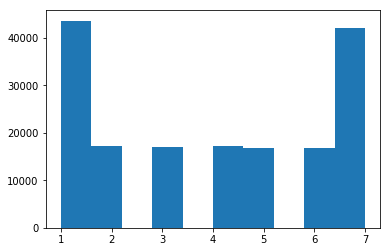

In [7]:
plt.hist(Respondent["tudiaryday"])

~Twice as much data from weekends as week days (Part of why the weights are important)

In [7]:
import math
SleepDict={} #Tabulate how much sleep each ID got
for ind, row in Activities.iterrows():
    if (row["trcodep"]==10101) | (row["trcodep"]==10199):
        if row["tucaseid"] in SleepDict.keys():
            SleepDict[row["tucaseid"]]+=row["tuactdur24"]
        else:
            SleepDict[row["tucaseid"]]=row["tuactdur24"]
    

In [8]:
cols=["DayOfWeek","Sleep","Weight"]

SleepList=[]
SleepInd=0
#SleepData.loc[1]=[5,2]

for ind, row in Respondent.iterrows():
    if (row["tulineno"]==1 and math.isnan(row["tudiaryday"]) != True) and row["tucaseid"] in SleepDict.keys():
        SleepList.append([row["tudiaryday"],SleepDict[row["tucaseid"]],row["tufnwgtp"]])
        #SleepData.loc[SleepInd]=[row["teage"],SleepDict[row["tucaseid"]]]
        #SleepInd+=1
SleepData=pd.DataFrame(SleepList,columns=cols)
SleepData["WeightXSleep"]=SleepData["Weight"]*SleepData["Sleep"]
print(SleepData.head())

   DayOfWeek  Sleep     Weight  WeightXSleep
0          6    870  8155463.0  7.095253e+09
1          7    620  1735323.0  1.075900e+09
2          7    560  3830528.0  2.145096e+09
3          5    720  6622023.0  4.767857e+09
4          5    385  3068387.0  1.181329e+09


Text(0,0.5,'Average Sleep per Night (hrs)')

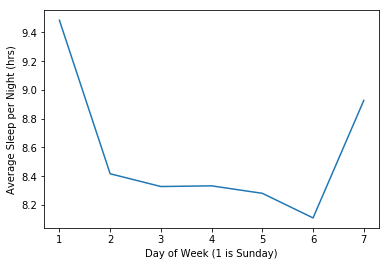

In [10]:
PT=pd.pivot_table(SleepData,index="DayOfWeek",values="Sleep",aggfunc=np.mean)
plt.plot(PT/60)
plt.xlabel("Day of Week (1 is Sunday)")
plt.ylabel("Average Sleep per Night (hrs)")
#plt.savefig("SleepVsAge_AllData.png")

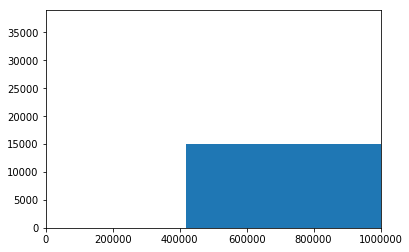

In [16]:
plt.hist(Respondent["tufnwgtp"],bins=100)
plt.xlim([0,1000000])
plt.show()

In [9]:
grouped = SleepData.groupby('DayOfWeek').sum()
grouped['wtdavg'] = grouped['WeightXSleep'] / grouped['Weight']
print(grouped.head())

              Sleep        Weight  WeightXSleep      wtdavg
DayOfWeek                                                  
1          24810779  1.624898e+11  9.333707e+13  574.418012
2           8704136  1.626074e+11  8.283574e+13  509.421595
3           8534821  1.634645e+11  8.219630e+13  502.839012
4           8560125  1.633597e+11  8.246685e+13  504.817634
5           8335856  1.627144e+11  8.147268e+13  500.709858


Text(0,0.5,'Average Sleep per Night (hrs)')

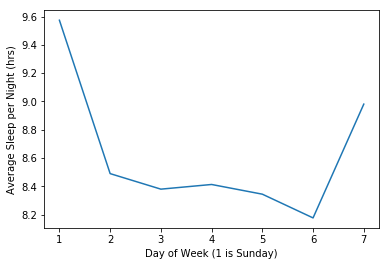

In [10]:
plt.plot(grouped["wtdavg"]/60)
plt.xlabel("Day of Week (1 is Sunday)")
plt.ylabel("Average Sleep per Night (hrs)")